# EE 610 Assignment 2 : Image Restoration using Machine Learning

#### Please Note: 
All the cells in the notebook should not be run directly. Some cells have the data generation code for which the images are in particular folders in my system. Running the code without changes will give an error and the output will be lost!

## 1. 
Download color images from the BSD dataset:
https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/

## 2.
Prepare the training dataset: [2] <br>
a. Select the largest odd window size W, e.g. 13 or 27 <br> 
b. Prepare a few blur kernels and noise models<br>
c. For each training image<br>
i. Degrade multiple times using different blur kernels and noise models<br>
ii. Display a few images to check if the degradation is realistic looking instead of too much or
too little<br>
iii. For each degraded image version:<br>
Mine and store degraded patches of size WxW and central pixel of original patch

In [1]:
import numpy as np
import random
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
def degrade(img, k = 3): #this function can be modified to change blurring and noise method/parameters
    blur_type = random.getrandbits(1) #returns 0 or 1 with 0.5 probability each
    if blur_type:
        img = cv2.blur(img, ksize= (k,k)) # Box Blur
#         print("Blur type: Box")
    else:
        img = cv2.GaussianBlur(img, (k,k), 1) # Gaussian Blur
#         print("Blur type: Gaussian")
    std_dev = np.random.normal(loc = 10, scale = 10) #choose standard deviation of noise randomly
    noise = np.random.normal(size = img.shape, scale = abs(std_dev)).astype(int) #noise to be added
    img = img + noise
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


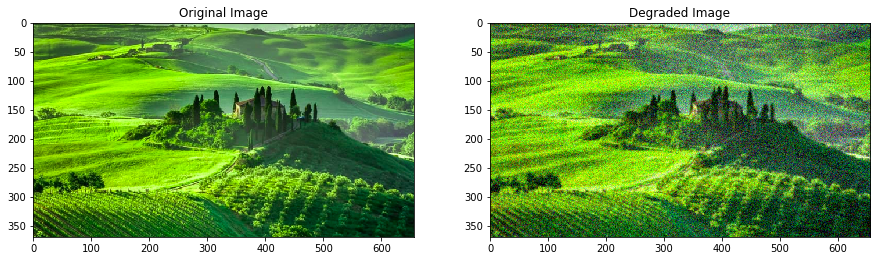

In [3]:
#Example Image to check degradation
nature = cv2.imread("../nature.png") #cv2 stores BGR instead of RGB
nature = cv2.cvtColor(nature, cv2.COLOR_BGR2RGB)  #Converting to RGB for display using matplotlib
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,12))
ax1.imshow(nature)
ax1.set_title("Original Image")
degraded = degrade(nature, k = 3)
ax2.imshow(degraded);
ax2.set_title("Degraded Image");

## DO NOT run the next 3 cells!

In [86]:
#Creating a metadata file to store information of patches and the central pixel

W = 27
#Dataframe to store the extracted data from images
metadata = pd.DataFrame(columns = ['Parent_Image', 'Patch_No', 'Patch_Filename','Central_BGR', 'Central_HSV', 'Central_HLS']) 

img_count = 0
for filename in os.listdir('BSDS300/images/train'):
    org_img = cv2.imread('/home/shreyas/Desktop/IITB Acads/Sem 5/EE610/Assignment_2/BSDS300/images/train/'+filename)
    org_img_hsv = cv2.cvtColor(org_img, cv2.COLOR_BGR2HSV)
    org_img_hls = cv2.cvtColor(org_img, cv2.COLOR_BGR2HLS)
#     plt.imshow(org_img) 
    img = degrade(org_img)  #function to blur and add noise to the original image 
    patch_no = 0
    for i in range(0, len(img)//W):
        for j in range(0, len(img[0])//W):
            patch = img[W*i:W*(i+1) , W*j:W*(j+1)] #non-overlapping patches of size WxW
            central_bgr = org_img[W*i + (W-1)//2, W*j + (W-1)//2]
            central_hsv = org_img_hsv[W*i + (W-1)//2, W*j + (W-1)//2]  # for W= 27, choose central pixel [13,13]
            central_hls = org_img_hls[W*i + (W-1)//2, W*j + (W-1)//2] 
            patch_filename = filename[:-4] + "_" + str(patch_no) + ".jpg"
            metadata.loc[len(metadata.index)] = [filename, patch_no, patch_filename, central_bgr, central_hsv, central_hls]
            saved = cv2.imwrite('Degraded_Patches/{}'.format(patch_filename), patch) #store the patch in local directory
            if (not saved):
                print('Error while saving {}'.format(patch_filename))
            patch_no += 1
    img_count += 1
    if img_count %5 == 0:
        print(img_count, "images completed")

5 images completed
10 images completed
15 images completed
20 images completed
25 images completed
30 images completed
35 images completed
40 images completed
45 images completed
50 images completed
55 images completed
60 images completed
65 images completed
70 images completed
75 images completed
80 images completed
85 images completed
90 images completed
95 images completed
100 images completed
105 images completed
110 images completed
115 images completed
120 images completed
125 images completed
130 images completed
135 images completed
140 images completed
145 images completed
150 images completed
155 images completed
160 images completed
165 images completed
170 images completed
175 images completed
180 images completed
185 images completed
190 images completed
195 images completed
200 images completed


In [165]:
metadata

,Parent_Image,Patch_No,Patch_Filename,Central_BGR,Central_HSV,Central_HLS
0,28075.jpg,0,28075_0.jpg,"[0, 39, 14]","[49, 255, 39]","[49, 20, 255]"
1,28075.jpg,1,28075_1.jpg,"[61, 111, 81]","[48, 115, 111]","[48, 86, 74]"
2,28075.jpg,2,28075_2.jpg,"[31, 78, 56]","[44, 154, 78]","[44, 55, 110]"
3,28075.jpg,3,28075_3.jpg,"[34, 102, 67]","[45, 170, 102]","[45, 68, 128]"
4,28075.jpg,4,28075_4.jpg,"[43, 79, 63]","[43, 116, 79]","[43, 61, 75]"
...,...,...,...,...,...,...
37395,126039.jpg,182,126039_182.jpg,"[82, 81, 91]","[177, 28, 91]","[177, 86, 15]"
37396,126039.jpg,183,126039_183.jpg,"[130, 123, 128]","[141, 14, 130]","[141, 127, 7]"
37397,126039.jpg,184,126039_184.jpg,"[64, 79, 71]","[46, 48, 79]","[46, 72, 27]"
37398,126039.jpg,185,126039_185.jpg,"[66, 78, 72]","[45, 39, 78]","[45, 72, 21]"


In [163]:
metadata.to_excel("metadata.xlsx") #takes few seconds

# Start running cells from here

In [4]:
import numpy as np
import cv2
from scipy import signal
import os
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [5]:
metadata = pd.read_excel("metadata.xlsx")  #takes a few seconds
metadata

,Unnamed: 0,Parent_Image,Patch_No,Patch_Filename,Central_BGR,Central_HSV,Central_HLS
0,0,28075.jpg,0,28075_0.jpg,[ 0 39 14],[ 49 255 39],[ 49 20 255]
1,1,28075.jpg,1,28075_1.jpg,[ 61 111 81],[ 48 115 111],[48 86 74]
2,2,28075.jpg,2,28075_2.jpg,[31 78 56],[ 44 154 78],[ 44 55 110]
3,3,28075.jpg,3,28075_3.jpg,[ 34 102 67],[ 45 170 102],[ 45 68 128]
4,4,28075.jpg,4,28075_4.jpg,[43 79 63],[ 43 116 79],[43 61 75]
...,...,...,...,...,...,...,...
37395,37395,126039.jpg,182,126039_182.jpg,[82 81 91],[177 28 91],[177 86 15]
37396,37396,126039.jpg,183,126039_183.jpg,[130 123 128],[141 14 130],[141 127 7]
37397,37397,126039.jpg,184,126039_184.jpg,[64 79 71],[46 48 79],[46 72 27]
37398,37398,126039.jpg,185,126039_185.jpg,[66 78 72],[45 39 78],[45 72 21]


In [6]:
metadata.groupby('Parent_Image').count()['Patch_No'].value_counts()

187    200
Name: Patch_No, dtype: int64

So for each of the 200 images, we have generated 187 patches.

In [104]:
df = metadata[["Patch_Filename"]]
df['Central_B'] = metadata['Central_BGR'].apply(lambda string: string[1:-1].split()[0])
df['Central_G'] = metadata['Central_BGR'].apply(lambda string: string[1:-1].split()[1])
df['Central_R'] = metadata['Central_BGR'].apply(lambda string: string[1:-1].split()[2])
y = df.loc[:19999,["Central_B", "Central_G", "Central_R"]] #take the first 10000 patches
display(df)
display(y)

,Patch_Filename,Central_B,Central_G,Central_R
0,28075_0.jpg,0,39,14
1,28075_1.jpg,61,111,81
2,28075_2.jpg,31,78,56
3,28075_3.jpg,34,102,67
4,28075_4.jpg,43,79,63
...,...,...,...,...
37395,126039_182.jpg,82,81,91
37396,126039_183.jpg,130,123,128
37397,126039_184.jpg,64,79,71
37398,126039_185.jpg,66,78,72


,Central_B,Central_G,Central_R
0,0,39,14
1,61,111,81
2,31,78,56
3,34,102,67
4,43,79,63
...,...,...,...
19995,91,84,75
19996,101,98,90
19997,119,131,137
19998,121,183,169


## 3. 

Train a regression model: <br>
a. Select a window size w less than or equal to the largest window size W <br>
b. Select a machine learning model (nonlinear regression), e.g. support vector regression, random
forest regression, neural network regression, or convolutional neural network <br>
c. Write a function to read only the w×w central pixels as input, and (optionally) pre-process them (e.g.
make it zero mean and unit variance, or work in HSI space) [1] <br>
d. In python, train a regression model to predict the clean (optionally, normalized) central pixel [1] <br>
e. Monitor the normalized mean square error or mean absolute error for validation data [1] <br>
f. Observe if models over-fits. If so, then implement early stopping <br>
g. Experiment with different choices, e.g. window size, machine learning models, capacity of models <br>
(e.g. tree depth, SVR penalty, number of hidden nodes in NN, number of layers and kernels in CNN,
etc.) to find a reasonable model with small normalized RMSE, e.g. less than 1% or 2%. [2]

In [93]:
W = 27
def extract_features(path, n = 10000):
    """
    Function to extract pixel values from the patches and store them in respective dataframes
    6 values of w have been taken: 3, 5, 7, 9, 11, 13, 15
    """
    features_3 = pd.DataFrame(columns = list(np.array(['p{}B p{}G p{}R'.format(x,x,x).split() for x in range(9)]).flatten()))
    features_5 = pd.DataFrame(columns = list(np.array(['p{}B p{}G p{}R'.format(x,x,x).split() for x in range(25)]).flatten()))
    features_7 = pd.DataFrame(columns = list(np.array(['p{}B p{}G p{}R'.format(x,x,x).split() for x in range(49)]).flatten()))
    features_9 = pd.DataFrame(columns = list(np.array(['p{}B p{}G p{}R'.format(x,x,x).split() for x in range(81)]).flatten()))
    features_11 = pd.DataFrame(columns = list(np.array(['p{}B p{}G p{}R'.format(x,x,x).split() for x in range(121)]).flatten()))
    features_13 = pd.DataFrame(columns = list(np.array(['p{}B p{}G p{}R'.format(x,x,x).split() for x in range(169)]).flatten()))
    features_15 = pd.DataFrame(columns = list(np.array(['p{}B p{}G p{}R'.format(x,x,x).split() for x in range(225)]).flatten()))
    df_list = [features_3, features_5,features_7,features_9,features_11,features_13, features_15]
    count = 0
    for patch_filename in df["Patch_Filename"][0:n]:
        patch = cv2.imread('Degraded_Patches/{}'.format(patch_filename))
        for i,w in enumerate([3,5,7,9,11,13,15]):
            small_patch = patch[(W-1)//2 - (w-1)//2: (W-1)//2 + (w-1)//2 + 1, (W-1)//2 - (w-1)//2: (W-1)//2 + (w-1)//2 + 1]
            flat = small_patch.flatten()
#             inten = np.apply_along_axis(func1d = lambda arr: round(sum(arr)/3), axis = 1, arr = flat)
            df_list[i].loc[len(df_list[i].index)] = flat
        count += 1
        if count%1000==0:
            print(count, "Files done")
    print('Finished extracting intensity values')
    return df_list

### Let us check the execution of the function for a few patches (n = 100)

In [94]:
features_check = extract_features('Degraded_Patches', n = 100)

Finished extracting intensity values


In [95]:
features_check[-1] #dataframe for w = 15

,p0B,p0G,p0R,p1B,p1G,p1R,p2B,p2G,p2R,p3B,...,p221R,p222B,p222G,p222R,p223B,p223G,p223R,p224B,p224G,p224R
0,7,49,32,25,70,53,28,75,53,28,...,47,8,47,32,19,55,41,0,35,19
1,51,94,73,56,100,77,38,79,48,66,...,42,41,85,62,22,71,43,34,87,48
2,31,83,59,23,81,53,28,87,56,49,...,67,34,72,66,24,65,60,31,87,68
3,32,71,49,50,90,65,54,103,75,48,...,69,38,95,70,41,98,77,30,92,76
4,70,106,92,62,106,83,46,101,62,51,...,73,64,124,83,39,102,60,26,90,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52,111,90,75,133,109,66,128,98,68,...,102,74,135,97,97,155,120,82,137,112
96,70,136,107,67,128,108,90,150,139,87,...,113,60,133,101,68,134,105,87,154,125
97,65,136,116,66,139,117,70,142,122,58,...,116,66,134,111,80,143,123,78,142,120
98,77,139,125,79,144,129,58,123,108,75,...,137,55,145,115,54,141,113,61,130,117


### Now let us extract features for the first 10000 patches which will be used for training

In [98]:
features = extract_features('Degraded_Patches', n = 20000)

1000 Files done
2000 Files done
3000 Files done
4000 Files done
5000 Files done
6000 Files done
7000 Files done
8000 Files done
9000 Files done
10000 Files done
11000 Files done
12000 Files done
13000 Files done
14000 Files done
15000 Files done
16000 Files done
17000 Files done
18000 Files done
19000 Files done
20000 Files done
Finished extracting intensity values


In [99]:
features_3, features_5, features_7,features_9,features_11,features_13, features_15 = tuple(features)

In [100]:
#saving extracted features in xlsx file for future use
for wi,features_w in enumerate(features):
    features_w.to_excel("features_{}.xlsx".format(3+ wi*2))
    print("Saved features file for w = {}".format(3+ wi*2))

Saved features file for w = 3
Saved features file for w = 5
Saved features file for w = 7
Saved features file for w = 9
Saved features file for w = 11
Saved features file for w = 13
Saved features file for w = 15


In [101]:
# loading the saved data

features_3 = pd.read_excel("features_3.xlsx")
print('Extracted features_3')
features_5 = pd.read_excel("features_5.xlsx")
print('Extracted features_5')
features_7 = pd.read_excel("features_7.xlsx")
print('Extracted features_7')
features_9 = pd.read_excel("features_9.xlsx")
print('Extracted features_9')
features_11 = pd.read_excel("features_11.xlsx")
print('Extracted features_11')
features_13 = pd.read_excel("features_13.xlsx")
print('Extracted features_13')
features_15 = pd.read_excel("features_15.xlsx")
print('Extracted features_15')

Extracted features_3
Extracted features_5
Extracted features_7
Extracted features_9
Extracted features_11
Extracted features_13
Extracted features_15


In [102]:
features_15 

,Unnamed: 0,p0B,p0G,p0R,p1B,p1G,p1R,p2B,p2G,p2R,...,p221R,p222B,p222G,p222R,p223B,p223G,p223R,p224B,p224G,p224R
0,0,7,49,32,25,70,53,28,75,53,...,47,8,47,32,19,55,41,0,35,19
1,1,51,94,73,56,100,77,38,79,48,...,42,41,85,62,22,71,43,34,87,48
2,2,31,83,59,23,81,53,28,87,56,...,67,34,72,66,24,65,60,31,87,68
3,3,32,71,49,50,90,65,54,103,75,...,69,38,95,70,41,98,77,30,92,76
4,4,70,106,92,62,106,83,46,101,62,...,73,64,124,83,39,102,60,26,90,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,80,77,69,59,56,48,75,66,56,...,42,72,72,48,72,67,46,71,58,50
19996,19996,67,61,54,67,63,52,69,71,52,...,174,141,144,149,118,124,131,119,130,138
19997,19997,79,84,69,90,96,79,86,86,72,...,112,105,124,129,64,83,91,64,75,89
19998,19998,185,196,194,180,193,195,137,164,161,...,106,69,79,97,58,68,86,80,95,104


### Training the SVM Model

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [118]:
features_dict = {3: features_3, 5: features_5, 7: features_7, 9: features_9,
                 11: features_11, 13: features_13, 15: features_15}

for w in [3,5,7,9,11,13,15]:
    
    print("\nw =", w)
    X_train, X_val, y_train, y_val = train_test_split(features_dict[w], y, test_size=0.15, random_state=42)

    X_train_df = pd.DataFrame(X_train)
    X_val_df = pd.DataFrame(X_val)
    X_train_df.drop(columns = ['Unnamed: 0'], inplace = True)
    X_val_df.drop(columns = ['Unnamed: 0'], inplace = True)
    # display(X_train_df)
    scaler = StandardScaler()
    X_train_df = pd.DataFrame(scaler.fit_transform(X_train_df))
    X_val_df = pd.DataFrame(scaler.transform(X_val_df))
    # display(X_train_df)
    
    X_train_b = X_train_df.loc[:, X_train_df.columns % 3 == 0]
    X_train_g = X_train_df.loc[:, X_train_df.columns % 3 == 1]
    X_train_r = X_train_df.loc[:, X_train_df.columns % 3 == 2]

    X_val_b = X_val_df.loc[:, X_val_df.columns % 3 == 0]
    X_val_g = X_val_df.loc[:, X_val_df.columns % 3 == 1]
    X_val_r = X_val_df.loc[:, X_val_df.columns % 3 == 2]
    
    blue= SVR(C=100, epsilon=1)
    green= SVR(C=100, epsilon=1)
    red= SVR(C=100, epsilon=1)
    # blue = RandomForestRegressor(n_estimators = 100)
    # green = RandomForestRegressor(n_estimators = 100)
    # red = RandomForestRegressor(n_estimators = 100)
    blue.fit(X_train_b, y_train['Central_B'])
    print("Trained Model for Blue")
    green.fit(X_train_g, y_train['Central_G'])
    print("Trained Model for Green")
    red.fit(X_train_r, y_train['Central_R'])
    print("Trained Model for Red");
    
    y_pred_b = blue.predict(X_val_b)
    y_pred_g = green.predict(X_val_g)
    y_pred_r = red.predict(X_val_r)
    
    print("RMSE for blue:",mean_squared_error(y_val['Central_B'], y_pred_b, squared = False))
    print("RMSE for green:",mean_squared_error(y_val['Central_G'], y_pred_g, squared = False))
    print("RMSE for red:",mean_squared_error(y_val['Central_R'], y_pred_r, squared = False))


w = 3
Trained Model for Blue
Trained Model for Green
Trained Model for Red
RMSE for blue: 12.586988397832636
RMSE for green: 12.596801202830306
RMSE for red: 12.726293169040233

w = 5
Trained Model for Blue
Trained Model for Green
Trained Model for Red
RMSE for blue: 11.533491139318611
RMSE for green: 11.318637987790424
RMSE for red: 11.540009964981598

w = 7
Trained Model for Blue
Trained Model for Green
Trained Model for Red
RMSE for blue: 11.670694804359615
RMSE for green: 11.544257061175665
RMSE for red: 11.628333708912903

w = 9
Trained Model for Blue
Trained Model for Green
Trained Model for Red
RMSE for blue: 11.77365278825873
RMSE for green: 11.664641585278792
RMSE for red: 11.802771835716483

w = 11
Trained Model for Blue
Trained Model for Green
Trained Model for Red
RMSE for blue: 11.984384569760028
RMSE for green: 11.877922369484665
RMSE for red: 12.081619166190983

w = 13
Trained Model for Blue
Trained Model for Green
Trained Model for Red
RMSE for blue: 12.187490622878808

In [127]:
w = 5

X_train, X_val, y_train, y_val = train_test_split(features_5, y, test_size=0.15, random_state=42)

X_train_df = pd.DataFrame(X_train)
X_val_df = pd.DataFrame(X_val)
X_train_df.drop(columns = ['Unnamed: 0'], inplace = True)
X_val_df.drop(columns = ['Unnamed: 0'], inplace = True)
# display(X_train_df)
scaler = StandardScaler()
X_train_df = pd.DataFrame(scaler.fit_transform(X_train_df))
X_val_df = pd.DataFrame(scaler.transform(X_val_df))
# display(X_train_df)

X_train_b = X_train_df.loc[:, X_train_df.columns % 3 == 0]
X_train_g = X_train_df.loc[:, X_train_df.columns % 3 == 1]
X_train_r = X_train_df.loc[:, X_train_df.columns % 3 == 2]

X_val_b = X_val_df.loc[:, X_val_df.columns % 3 == 0]
X_val_g = X_val_df.loc[:, X_val_df.columns % 3 == 1]
X_val_r = X_val_df.loc[:, X_val_df.columns % 3 == 2]

blue= SVR(C=100, epsilon=1)
green= SVR(C=100, epsilon=1)
red= SVR(C=100, epsilon=1)

blue.fit(X_train_b, y_train['Central_B'])
print("Trained Model for Blue")
green.fit(X_train_g, y_train['Central_G'])
print("Trained Model for Green")
red.fit(X_train_r, y_train['Central_R'])
print("Trained Model for Red");

Trained Model for Blue
Trained Model for Green
Trained Model for Red


## 4. 

Apply the model on held-out or private images (couple of them synthetically degraded, couple of them real
images with slightly poor quality): [2] <br>
a. For each degraded testing image<br>
i. Initialize blank clean image<br>
ii. For each overlapping patch of w opt ×w opt <br>
    1. Predict clean central pixel <br>
    2. Optionally denormalize (multiply the std deviation, add the mean, or inverse HSI) <br>
iii. Contrast enhance using a function call (no need to implement from scratch) and put the
pixels in the right range (0-255, integer) <br>
iv. Display the cleaned image 

In [119]:
# from joblib import dump, load

# dump(blue, 'model_blue.joblib')  #saves the model
# dump(green, 'model_green.joblib')
# dump(red, 'model_red.joblib');

In [84]:
# blue = load('model_blue.joblib')  #loads the model
# green = load('model_green.joblib')
# red = load('model_red.joblib');

In [128]:
count = 0
def patch_to_pixel(patch):
    global count
    patch = scaler.transform(patch.reshape(1,-1))
    b = np.array([patch[0][i] for i in range(len(patch[0])) if i%3 == 0])
    g = np.array([patch[0][i] for i in range(len(patch[0])) if i%3 == 1])
    r = np.array([patch[0][i] for i in range(len(patch[0])) if i%3 == 2])
    b_pred = blue.predict(b.reshape(1,-1))
    g_pred = green.predict(g.reshape(1,-1))
    r_pred = red.predict(r.reshape(1,-1))
    count += 1
    if count % 5000 == 0:
        print(count, "Patches done")
    return [b_pred[0], g_pred[0], r_pred[0]]

In [129]:
def restore(img):
    global count
    count = 0
    w = 5
    print("w =", w)
    #Vectorize the wxw patches in the image before ML prediction to speed up the process
    patch_list = []
    print('Vectorizing the patches of the image')
    for i in range((w-1)//2, img.shape[0] - (w+1)//2):
        row = []
        for j in range((w-1)//2, img.shape[1] - (w+1)//2):
            patch = img[i - (w-1)//2: i + (w-1)//2 + 1, j - (w-1)//2: j + (w-1)//2 + 1]
            row.append(patch)      
        patch_list.append(row)
        if i % 100 == 0:
            print("{} rows completed".format(i))
    print('Vectorization done')
    
    patch_array = np.array(patch_list)
    print("Shape of Patch Array:", patch_array.shape)
    dim_0, dim_1 = patch_array.shape[0], patch_array.shape[1]
    print("No. of patches along x dimension:", dim_0)
    print("No. of patches along y dimension:", dim_1)
    patch_array = patch_array.reshape((dim_0*dim_1, w*w*3))
    print("Shape after flattening across the spatial dimensions:", patch_array.shape)
    print("No.of patches in the image:", len(patch_array))
    
    #Apply the ML Models on the patches
    #np.apply_along_axis is faster than using nested for loops
    print("Restoring the image using ML model")
    restored_array = np.apply_along_axis(patch_to_pixel, axis = 1, arr = patch_array)
    restored = restored_array.reshape((dim_0,dim_1,3)).astype(int) #cast the array back into the image shape
    print("All Patches done. Execution Complete")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (9,9))
    ax1.imshow(img)
    ax1.set_title('Degraded Image')
    ax2.imshow(restored)
    ax2.set_title('Restored Image');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


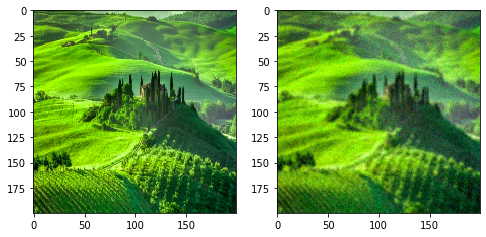

In [130]:
nature = cv2.imread("../nature.png")
nature = cv2.resize(nature, (200,200))
nature = cv2.cvtColor(nature, cv2.COLOR_BGR2RGB)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,8))
ax1.imshow(nature)
degraded = degrade(nature, k = 3)
ax2.imshow(degraded);

In [131]:
nature.shape

(200, 200, 3)

w = 5
Vectorizing the patches of the image
100 rows completed
Vectorization done
Shape of Patch Array: (195, 195, 5, 5, 3)
No. of patches along x dimension: 195
No. of patches along y dimension: 195
Shape after flattening across the spatial dimensions: (38025, 75)
No.of patches in the image: 38025
Restoring the image using ML model
5000 Patches done
10000 Patches done
15000 Patches done
20000 Patches done
25000 Patches done
30000 Patches done
35000 Patches done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


All Patches done. Execution Complete


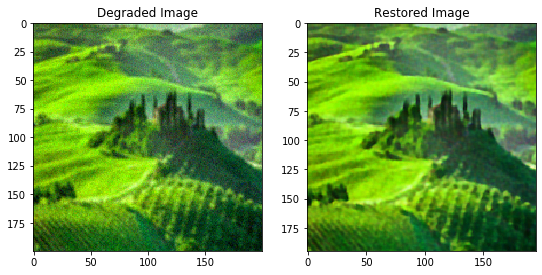

In [132]:
restore(degraded)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


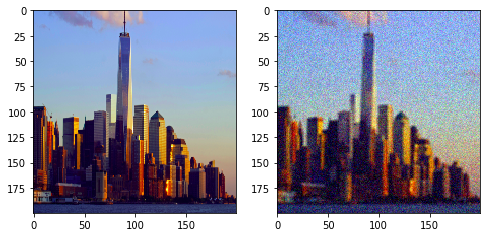

In [135]:
city = cv2.imread("../manhattan.png")
city = cv2.resize(city, (200,200))
city = cv2.cvtColor(city, cv2.COLOR_BGR2RGB)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,8))
ax1.imshow(city)
degraded2 = degrade(city, k = 3)
ax2.imshow(degraded2);

w = 5
Vectorizing the patches of the image
100 rows completed
Vectorization done
Shape of Patch Array: (195, 195, 5, 5, 3)
No. of patches along x dimension: 195
No. of patches along y dimension: 195
Shape after flattening across the spatial dimensions: (38025, 75)
No.of patches in the image: 38025
Restoring the image using ML model
5000 Patches done
10000 Patches done
15000 Patches done
20000 Patches done
25000 Patches done
30000 Patches done
35000 Patches done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


All Patches done. Execution Complete


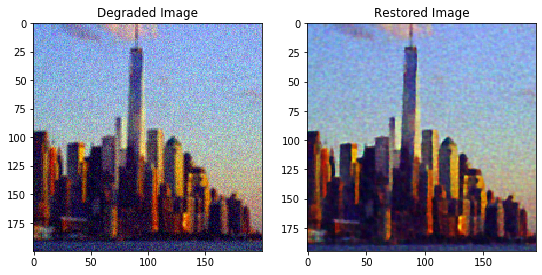

In [136]:
restore(degraded2)

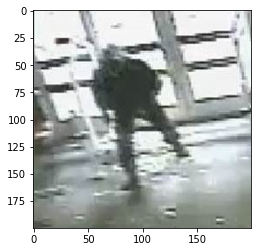

In [137]:
poor = cv2.imread("../poor_quality.png")
poor = cv2.resize(poor, (200,200))
poor = cv2.cvtColor(poor, cv2.COLOR_BGR2RGB)
plt.imshow(poor)

w = 5
Vectorizing the patches of the image
100 rows completed
Vectorization done
Shape of Patch Array: (195, 195, 5, 5, 3)
No. of patches along x dimension: 195
No. of patches along y dimension: 195
Shape after flattening across the spatial dimensions: (38025, 75)
No.of patches in the image: 38025
Restoring the image using ML model
5000 Patches done
10000 Patches done
15000 Patches done
20000 Patches done
25000 Patches done
30000 Patches done
35000 Patches done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


All Patches done. Execution Complete


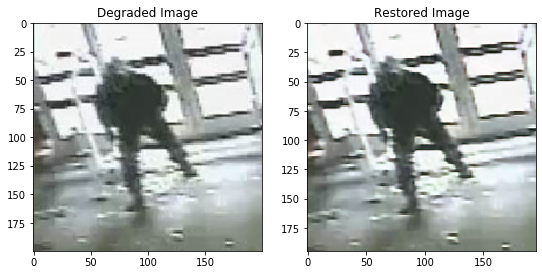

In [138]:
restore(poor)

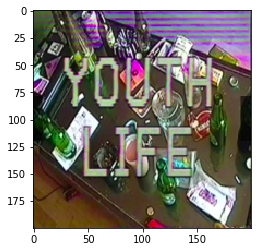

In [139]:
poor = cv2.imread("../poor_quality_2.png")
poor = cv2.resize(poor, (200,200))
poor = cv2.cvtColor(poor, cv2.COLOR_BGR2RGB)
plt.imshow(poor)

w = 5
Vectorizing the patches of the image
100 rows completed
Vectorization done
Shape of Patch Array: (195, 195, 5, 5, 3)
No. of patches along x dimension: 195
No. of patches along y dimension: 195
Shape after flattening across the spatial dimensions: (38025, 75)
No.of patches in the image: 38025
Restoring the image using ML model
5000 Patches done
10000 Patches done
15000 Patches done
20000 Patches done
25000 Patches done
30000 Patches done
35000 Patches done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


All Patches done. Execution Complete


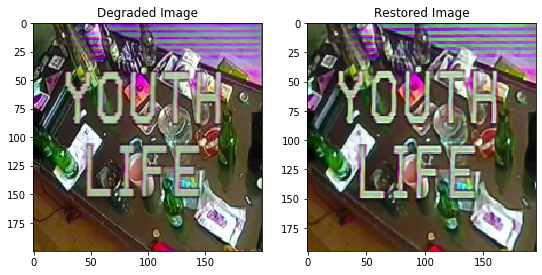

In [140]:
restore(poor)

## 5. 

Your report or ipython comment cells should contain the following: [2] <br>
a. Your design choices: which window size range and ML models you will try <br>
b. Your initial guess of what trends you will observe about what will work better <br>
c. Your observation, and any surprises in what worked better. E.g., was there a maximum window size
above which you did not get any advantage when you increased the window size further? Did you
expect CNN to be better, but something else turned out to be better? Did you expect a more
complex model to work better? <br>
d. Some thoughts on why you think you had any surprising observations. <br>
e. References, including internet sources of code, blogs, or friends with whom you discussed. <br>

#### Response:

I took W as 27, split the images into patches and stored the patches as png images in my system. Then from each patch I extracted the central w x w patches and made feature dataframes for various w sizes. The w sizes I chose are 3, 5, 7, 9, 11, 13, 15. I used Support Vector Regression and Random Forest Regression, but found that both were giving almost similar results so I went forward with SVM since the training time was less <br>

My initial guess was that the task was too-tough to be accomplished using non-deep models. But it turns out that the performance was decent (RMSE around 11) with SVMs. Of course a neural network could have performed better, but I preferred experimenting with classical ML approaches and ended up getting the above results using SVM. <br>

The window size which gave best results was w = 5 so I decided to stick with that for using on the custom images. This was surprising because small window size involves less data. However a reason can be that the pixels near to the central one are the only ones that matter and hence a low window size ensured that the data we included to train our model was nothing but the most relevant features. A more complex model using deep learning will work better and reduce the RMSE further <br>


##### References

Scikit Learn library for Machine Learning: https://scikit-learn.org/stable/ <br>
    1. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
    2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
Image Blurring Article: https://www.geeksforgeeks.org/python-image-blurring-using-opencv/ <br>  